In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
import seaborn as sns
import pickle

read data

In [108]:
data = pd.read_csv('../../Data/cleaned_v2.csv')

In [109]:
len(data)

22187

# split data

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(data["Content_cleaned_v1"], data["Label"], test_size= 0.4, random_state= 42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((13312,), (13312,), (8875,), (8875,))

In [111]:
X_train[X_train.isna() == True]

Series([], Name: Content_cleaned_v1, dtype: object)

# extract feature

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer()
vector_train = tf_idf_vec.fit_transform(X_train)
vector_train

<13312x83803 sparse matrix of type '<class 'numpy.float64'>'
	with 2994165 stored elements in Compressed Sparse Row format>

# turning parameters

In [113]:
# param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly']}
# # Set up score
# scoring = ['accuracy']
# # Set up the k-fold cross-validation
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
# # Define grid search
# grid_search = GridSearchCV(estimator=svm.SVC(), 
#                            param_grid=param_grid, 
#                            scoring=scoring, 
#                            refit='accuracy', 
#                            n_jobs=-1, 
#                            cv=kfold, 
#                            verbose=0)
# # Fit grid search
# grid_result = grid_search.fit(vector_train, Y_train)
# # Print grid search summary
# grid_result.best_params_

In [114]:
# scores = [grid_search.cv_results_['split0_test_accuracy'], grid_search.cv_results_['split1_test_accuracy'], 
#          grid_search.cv_results_['split2_test_accuracy'], grid_search.cv_results_['split3_test_accuracy'], 
#          grid_search.cv_results_['split4_test_accuracy'], grid_search.cv_results_['split5_test_accuracy'], 
#          grid_search.cv_results_['split6_test_accuracy'], grid_search.cv_results_['split7_test_accuracy'], 
#          grid_search.cv_results_['split8_test_accuracy'], grid_search.cv_results_['split9_test_accuracy'], ]

# # plot the accuracy scores for each fold using a box plot
# max_scores = [max(x) for x in scores]
# plt.plot(max_scores)
# plt.xlabel('Validation Set')
# plt.ylabel('Accuracy')
# plt.title('Accuracy of each Validation Set in GridSearchCV')
# plt.show()

# modeling

In [115]:
classifier = svm.SVC(C= 10, gamma= 0.1, kernel= "rbf")
classifier.fit(vector_train, Y_train)

SVC(C=10, gamma=0.1)

# predict

In [116]:
vector_test = tf_idf_vec.transform(X_test)
y_pred = classifier.predict(vector_test)

# report 

In [117]:
# heatconmat(y_pred, Y_test)
print(classification_report(y_pred, Y_test, digits=4))

              precision    recall  f1-score   support

   Chinh tri     0.9281    0.9104    0.9192      1149
    Giai tri     0.9229    0.9138    0.9183      1323
    Giao duc     0.9406    0.9505    0.9455       949
    Khoa hoc     0.9858    0.9598    0.9726       796
     Kinh te     0.9222    0.9316    0.9269      1578
   Phap luat     0.8010    0.8453    0.8226       362
    Suc khoe     0.9653    0.9638    0.9645      1269
    The thao     0.9933    0.9822    0.9877       899
     Van hoa     0.7745    0.8055    0.7897       550

    accuracy                         0.9291      8875
   macro avg     0.9149    0.9181    0.9163      8875
weighted avg     0.9300    0.9291    0.9295      8875



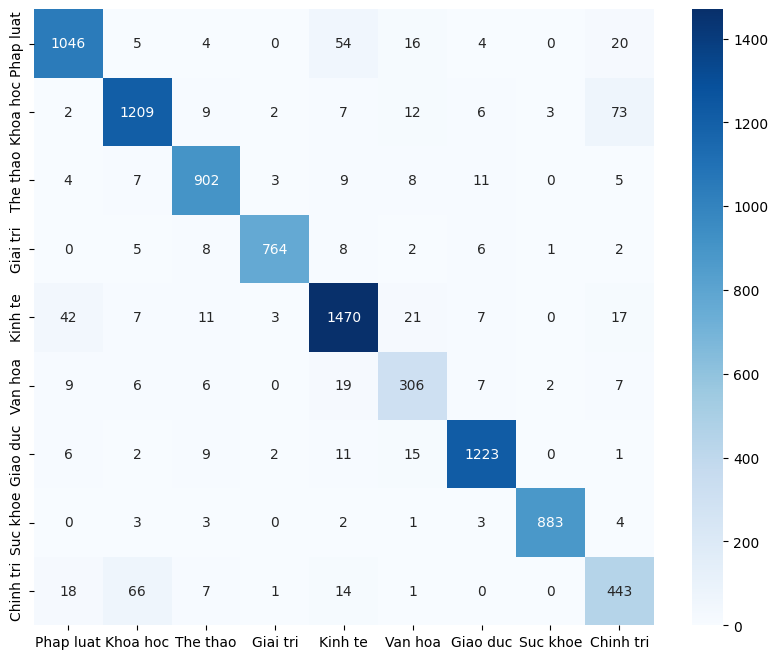

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def heatconmat(y_pred, y_test):
  plt.figure(figsize=(10,8))
  cnf_matrix = confusion_matrix(y_pred, y_test)
  ax = sns.heatmap(cnf_matrix, annot=True, fmt='', cmap='Blues')
  ax.xaxis.set_ticklabels(list(set(y_test)))
  ax.yaxis.set_ticklabels(list(set(y_test)))
  plt.show()
heatconmat(y_pred, Y_test)

# check 

In [119]:
arr_wrong = []
for i, v in enumerate(y_pred):
  if v != np.array(Y_test)[i]:
    arr_wrong.append(i)

In [120]:
arr_true = []
for i, v in enumerate(y_pred):
  if v == np.array(Y_test)[i]:
    arr_true.append(i)

In [121]:
l = pd.Series(sorted([len(x.split()) for x in np.array(X_test)[arr_wrong]]))

In [122]:
t = pd.Series(sorted([len(x.split()) for x in np.array(X_test)[arr_true]]))

In [139]:
len(l), len(l[l.values > 300])

(629, 470)

In [124]:
np.mean(t)

500.21113267038567

In [125]:
np.mean(l)

517.8139904610492

<AxesSubplot:>

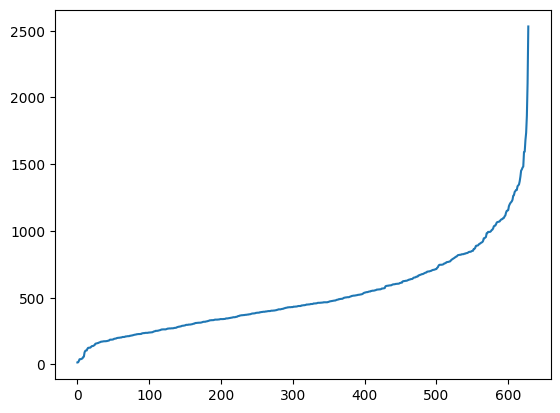

In [126]:
l.plot()

<AxesSubplot:>

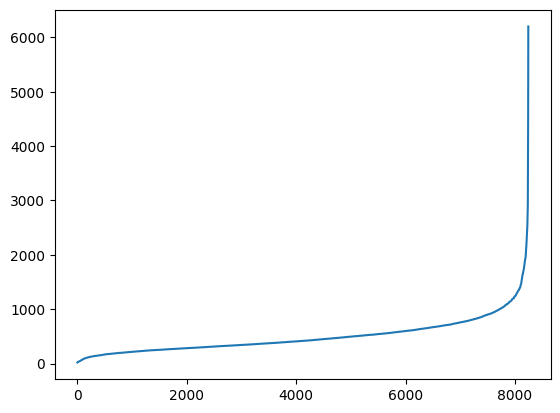

In [127]:
t.plot()

In [128]:
np.array(X_test)[arr_wrong][2]

'hiện công_ty cp công_trình công_cộng hội_an có đơn kiến_nghị gửi ubnd tp hội_an_hủy kết_quả phê_duyệt lựa_chọn nhà_thầu thực_hiện gói_thầu duy_trì cây_xanh điện chiếu sáng hội an chủ đầu_tư bên mời_thầu có trách_nhiệm trả_lời kiến_nghị của nhà_thầu trao_đổi về những vấn_đề liên_quan đến đấu_thầu gói_thầu duy_trì cây_xanh đô_thị điện chiếu sáng hội_an quảng_nam luật_sư mai duy_phước công_ty luật mmt partners đoàn luật_sư thành_phố đà_nẵng cho biết trong quá_trình tham_gia dự_thầu khi nhà_thầu nhận thấy những vấn_đề liên_quan đến quá_trình lựa_chọn nhà_thầu đang gây ảnh_hưởng đến quyền lợi_ích của mình thì có quyền kiến_nghị để yêu_cầu xem_xét cụ_thể tại điểm khoản điều luật_đấu_thầu thì khi thấy quyền và lợi_ích hợp_pháp của mình bị ảnh_hưởng nhà_thầu nhà đầu_tư có quyền kiến_nghị với bên mời_thầu chủ đầu_tư người có thẩm_quyền về các vấn_đề trong quá_trình lựa_chọn nhà_thầu nhà đầu_tư về kết_quả lựa_chọn nhà_thầu nhà đầu_tư theo quy_trình giải_quyết kiến_nghị quy_định tại điều của luậ

In [129]:
np.array(y_pred)[arr_wrong][2]

'Kinh te'

In [130]:
np.array(Y_test)[arr_wrong][2]

'Phap luat'

In [131]:
check = pd.DataFrame({"content": np.array(X_test)[arr_wrong], "predicted": np.array(y_pred)[arr_wrong], "true label": np.array(Y_test)[arr_wrong]})

In [132]:
check['lennn'] = check['content'].apply(lambda x: len(x.split()))

In [133]:
check

,content,predicted,true label,lennn
0,thông_báo ngày cho biết thực_hiện quy_định tại...,Chinh tri,Phap luat,174
1,sinh ra là một đứa trẻ lành_lặn bình_thường tư...,Giai tri,Van hoa,1186
2,hiện công_ty cp công_trình công_cộng hội_an có...,Kinh te,Phap luat,834
3,gia_đình môi_trường xã_hội đầu_tiên của con_ng...,Giai tri,Giao duc,495
4,diễn_viên nsưt chiều_xuân được yêu_mến qua nhi...,Giai tri,Van hoa,354
...,...,...,...,...
624,theo thông_báo của viện nghiên_cứu hán nôm ngà...,Giai tri,Van hoa,401
625,chiều tại thư_viện tỉnh số trần_hưng_đạo tp nh...,Chinh tri,Van hoa,186
626,tiếp_tục chương_trình phiên họp thứ sáng ủy_ba...,Chinh tri,Kinh te,610
627,nhóm tác_giả người pháp làm dấy lên lo_ngại về...,Khoa hoc,Suc khoe,477


In [134]:
len(check)

629

In [135]:
data[data["Content_cleaned_v2"] == np.array(X_test)[arr_wrong][4]].iloc[0].Link

IndexError: single positional indexer is out-of-bounds